## Generate Mandelbrot Set using TensorFlow

Tutorial Link: https://www.tensorflow.org/tutorials/mandelbrot

Just to test out generating a Mandelbrot Set using TensorFlow. TF's interactive session is used. Main goal is to test out the code.  
Look for Mandelbrot.py to generate a higher resolution Mandelbrot image.

In [20]:
import tensorflow as tf
import numpy as np
import PIL.Image
from io import BytesIO
from IPython.display import Image, display, clear_output

In [2]:
def addFractalToList(li, a, fmt='jpeg'):
  """Generate image using iteration counts 'a' and add it to list 'li' using the format 'fmt'."""
  f = genFractalImage(a, fmt)
  li.append(Image(data=f.getvalue()))

In [3]:
def genFractalImage(a, fmt):
  """Return an image generated using iteration counts 'a'."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  return f
  #PIL.Image.fromarray(a).save('out.jpeg') # For saving image as 'out.jpeg', used for debugging

In [4]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
    colorful picture of a fractal."""
  f = genFractalImage(a, fmt)
  display(Image(data=f.getvalue()))

In [5]:
# Start TF Interactive Session
sess = tf.InteractiveSession()

# NP arrays
# Instead of using 0.005, use a smaller value for a more detailed image
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

# List to store image for every iteration
li = []

# TF variables
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [6]:
tf.global_variables_initializer().run()

# Operation for computing Mandelbrot Set, Z = Z^2 + C
# Keep track of the iteration needed for Z to grow larger than VALUE

# Change these values to make small changes to the image generated
DIVERGE_CAP = 4
NUM_ITERATION = 200

# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < DIVERGE_CAP

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

for i in range(NUM_ITERATION): 
    step.run()
    addFractalToList(li, ns.eval())

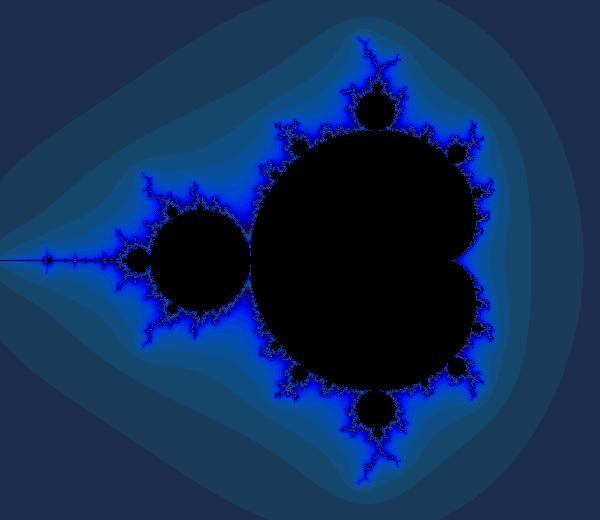

In [7]:
DisplayFractal(ns.eval())

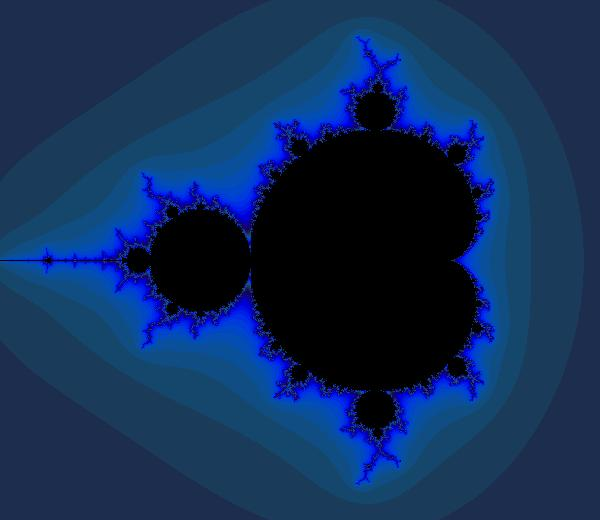

In [24]:
# Code for Iteractive Slider
from ipywidgets import IntSlider

x = IntSlider(min=0, max=NUM_ITERATION-1, step=1, value=0)

def func(y):
    num = y['new']
    clear_output()
    display(li[num])

x.observe(func, names='value')

display(x)